<a href="https://colab.research.google.com/github/duberii/pid-playground/blob/main/activities/Introduction_to_ROOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to ROOT**
---
Welcome to Particle Identification Playground! This activity is designed to introduce you to the visualization tools used for particle identification.

**Before attempting this notebook, complete the following activities:**
*   Introduction to Vectors
*   Introduction to Special Relativity
*   Introduction to Pandas
*   Introduction to the Standard Model

**At the end of this notebook, you will be able to:**
*   Describe the goals of particle identification
*   Create, fill, and draw 1D histograms in ROOT
*   Associate mathematical and visual depictions of error and statistical fluctuations in 1D histograms






In [1]:
#@title Run this cell before starting. This may take a few minutes to run.
%%capture
!wget https://github.com/MohamedElashri/ROOT/releases/download/ubuntu/root_v6.28.04_Ubuntu_20.04.zip
!unzip /content/root_v6.28.04_Ubuntu_20.04.zip
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion
!apt-get inatall libpython3.6-dev
!rm -f root_v6.28.04_Ubuntu_20.04.zip
!wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
!sudo dpkg -i libssl1.1_1.1.1f-1ubuntu2_amd64.deb
!rm -f libssl1.1_1.1.1f-1ubuntu2_amd64.deb
!wget https://github.com/duberii/pid-playground/raw/main/data/GlueX_Particle_Gun_Simplified.hdf5
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")
import ctypes
ctypes.cdll.LoadLibrary('/content/root_build/lib//libCore.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libThread.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libTreePlayer.so')
import pandas
from ROOT import *
import pandas as pd
import numpy as np
masses = {'Proton':0.93827,'Neutron':0.93957,'Kaon':0.49367,'Muon':0.10566,'Pion':0.13957,'Electron':0.000511,'Photon':0}
pure_dataframe = pd.DataFrame()
ptypes = []
for ptype in masses.keys():
  for i in range(10000):
    ptypes.append(ptype)
pure_dataframe['Particle'] = ptypes
pxs = [np.random.uniform(0,1) for i in range(70000)]
pys = [np.random.uniform(0,1) for i in range(70000)]
pzs = [np.random.uniform(0,1) for i in range(70000)]
Es = [(masses[pure_dataframe.iloc[i]['Particle']]**2+pxs[i]**2+pys[i]**2+pzs[i]**2)**0.5 for i in range(70000)]
pure_dataframe['E'] = Es
pure_dataframe['px']= pxs
pure_dataframe['py'] = pys
pure_dataframe['pz'] = pzs

---
##**What is Particle Identification?**
---
When looking into a microscope, it is fairly easy to recognize what you are looking at. Being able to see an object gives you enough information to determine what that object is. Unfortunately, we can't see any subatomic particles under a microscope, which makes them extremely hard to recognize. Instead, particle physics experiments use a collection of extremely specialized detectors to collect information about the particles that pass through them. Just like how a detective will use clues at a crime scene to try and find the criminal, the particle identification process tries to use the signals from the various detectors to figure out what particle passed through it.

Lucky for us, there are a variety of well-established methods used to identify particles. Run the cell below to see an example of the types of plots used for particle identification.

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).


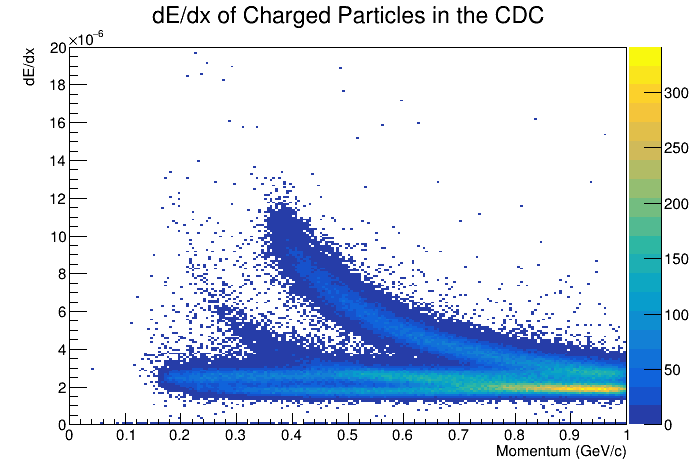

In [5]:
df = pd.read_hdf('GlueX_Particle_Gun_Simplified.hdf5','event1')
c1 = TCanvas('c1','c1',700,500)
h1 = TH2D('h1','dE/dx of Charged Particles in the CDC;Momentum (GeV/c);dE/dx',200,0,1,200,0,0.00002)
for row in df.iloc:
  h1.Fill(row['p'],row['dEdxCDC'])
h1.SetStats(0)
h1.Draw('COLZ')
gROOT.GetListOfCanvases().Draw()

The image above shows the ionization energy loss (dE/dx) of different particles in the central drift chamber of the GlueX detector (shown below). In future activities, we will learn how each of these detectors work and how they can be used to identify particles.

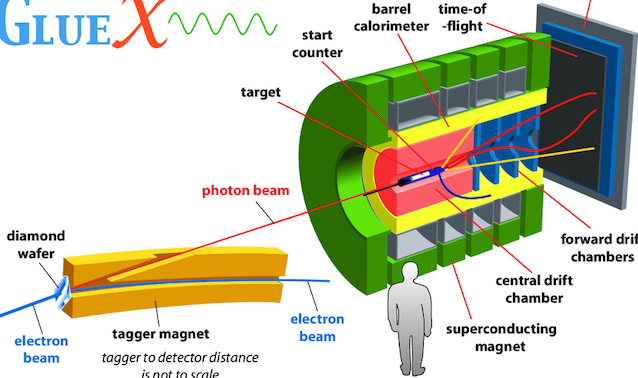

---
##**How do we analyze data in particle physics?**
---
The most common tool for data analysis in particle physics is ROOT, a library developed by CERN. The majority of histograms and plots in particle physics papers are created using ROOT, so it is a very valuable tool to know how to use.

In this notebook, we will use ROOT to distinguish particles based on their invariant mass. As a reminder, the formula for invariant mass is:
$$m = \sqrt{E^2-|p|^2},$$
where $E$ is the relativistic energy of the particle and
$$|p|^2 = p_x^2+p_y^2+p_z^2$$
is the magnitude of the particle's momentum vector.

####**Question #1:**
---
Values for the momentum and energy are given in the dataframe `pure_dataframe`. Write code in the cell below that adds a new column, titled "m", which computes the invariant mass of the particles using the formula shown above.

In [ ]:
pure_dataframe['m'] =

#####**Solution:**

In [ ]:
pure_dataframe['m'] =(pure_dataframe['E']**2- pure_dataframe['px']**2-pure_dataframe['py']**2-pure_dataframe['pz']**2)**0.5

---
##**Histograms in ROOT**
---

At this point, we have no good way to visualize our data. This is where ROOT comes in! We will create a 1D histogram of these calculated masses using ROOT, but these same steps can be slightly modified to create other types of plots too.

---
### **Step 1:** Creating a Canvas
---
In ROOT, a canvas is simply a space where you can draw figures. You can create a canvas using the `TCanvas` constructor:
```
my_canvas = TCanvas('canvas_name','canvas_title',canvas_width,canvas_height)
```

####**Question #2:**
---
Modify the code shown below to create a canvas named `c1`, titled `Invariant Masses`, and set its width and height to 700 and 500.

In [ ]:
canvas = TCanvas('c1','Invariant Masses',1000,200)

#####**Solution:**

In [ ]:
canvas = TCanvas('c1','Invariant Masses',700,500)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


---
### **Step 2:** Creating a Histogram
---
After we create a canvas, we can create a histogram. In ROOT, there are several types of histograms, depending on how much information we want to store in each bin. For our purposes, we want to use the `TH1D` constructor:
```
my_histogram = TH1D('histogram_name','histogram_title; x axis label; y axis label', num_bins, min_value, max_value)
```

####**Question #3:**
---
Write code in the cell below to create a histogram with the following properties:


*   Name: h1
*   Title: Invariant Masses of Stable Particles
*   X axis label: Mass (GeV/c^2)
*   Y axis label: Counts
*   Number of bins: 100
*   Minimum X value: 0
*   Maximum X value: 1



Note that in Google Colab, we need this extra line of code that draws the canvas, but in general, this is not necessary.

In [ ]:
histogram =
histogram.Draw()
gROOT.GetListOfCanvases().Draw()

#####**Solution:**

Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).


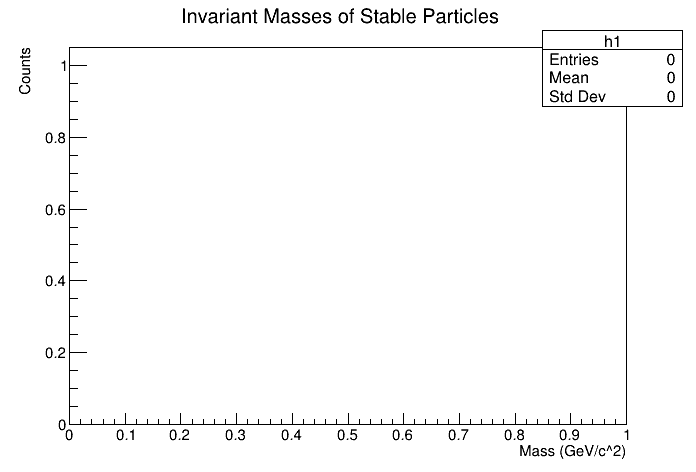

In [ ]:
histogram = TH1D('h1','Invariant Masses of Stable Particles; Mass (GeV/c^2); Counts',100,0,1)
histogram.Draw()
gROOT.GetListOfCanvases().Draw()

---
### **Step 3:** Filling the Histogram
---
So far, we have created a histogram, but we have not populated it with any data! To do this, we call the `Fill` method of the histogram, which takes the value we want to add to the histogram as an argument. For example,
```
histogram.Fill(100)
```
will add the value 100 to the histogram.

---

####**Question #4:**
---
Write code in the cell below to fill the histogram with the calculated mass value for each particle in the dataframe. **Hint:** use the `.iloc` property of the dataframe to loop over the rows of the dataframe.

In [ ]:
for

histogram.Draw()
gROOT.GetListOfCanvases().Draw()

#####**Solution:**

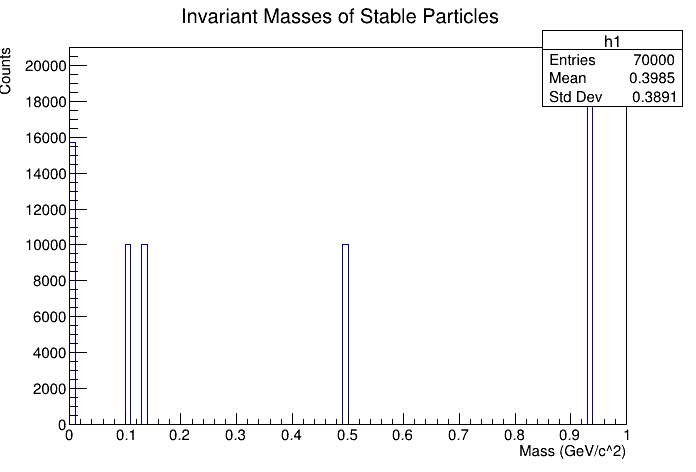

In [ ]:
for row in pure_dataframe.iloc:
  histogram.Fill(row['m'])
histogram.Draw()
gROOT.GetListOfCanvases().Draw()

---
### **Putting it All Together**
---
All together, your code should look something like:

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).


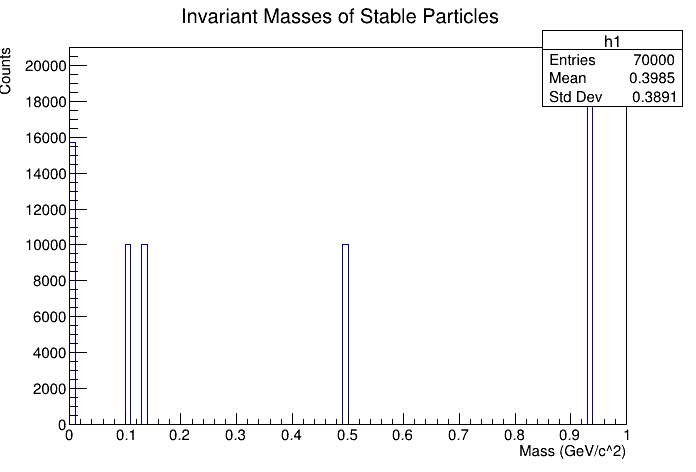

In [ ]:
#Step 1: Create a canvas
canvas = TCanvas('c1','Invariant Masses',700,500)
#Step 2: Creating a histogram
histogram = TH1D('h1','Invariant Masses of Stable Particles; Mass (GeV/c^2); Counts',100,0,1)

#Step 3: Filling the histogram
for row in pure_dataframe.iloc:
  histogram.Fill(row['m'])

#Drawing the histogram
histogram.Draw()
gROOT.GetListOfCanvases().Draw()

The statistics box (shown in the top right) contains information about how many data points are displayed (in this case 70,000), their mean, and their standard deviation. However, this statistics box can often block important parts of the histogram. To disable the statistics box, we can use the `setStats` method of the `TH1D` class. The argument of this method should be 0 to hide the statistics box, or 1 to show the statistics box. However, the statistics box is displayed by default, so the `SetStats` method is typically only used to hide it.

Run the code below to hide the statistics box, then redraw the histogram.

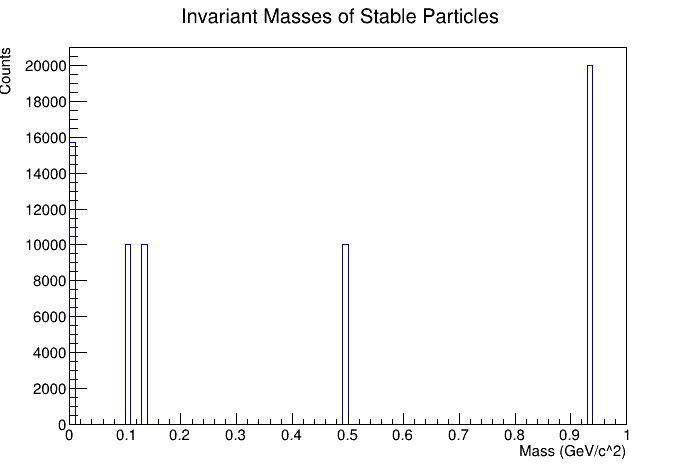

In [ ]:
histogram.SetStats(0)
histogram.Draw()
gROOT.GetListOfCanvases().Draw()

---
## **Reading 1D Histograms**
---
In a 1D histogram, only one value is being plotted. The value is plotted along the x axis (and in this case, this value is mass). The x axis is broken up into regions called **bins**. Instead of keeping track of every individual value we are plotting, bins only keep track of how many times a value falls within its range of values. For example, in the plot shown above, the smallest bin (which stores values between 0 and 0.01) counted that around 16,000 rows of the pandas dataframe had a mass between 0 and 0.01. This is why the y axis is typically labelled "counts": A 1D histogram is simply counting how many values fall within each bin.

####**Question #5:**
---
There are 7 particles that we usually observe in our detectors. These particles are: Photons, Electrons, Muons, Protons, Neutrons, Kaons, and Pions. Why do we only see 5 spikes on the histogram? If needed, alter the code below to find all 7 peaks (not necessarily all at once). **Hint:** Look up the invariant masses of these particles.

In [ ]:
#Step 1: Create a canvas
canvas = TCanvas('c1','Invariant Masses',700,500)
#Step 2: Creating a histogram
histogram = TH1D('h1','Invariant Masses of Stable Particles; Mass (GeV/c^2); Counts',100,0,1)

#Step 3: Filling the histogram
for row in pure_dataframe.iloc:
  histogram.Fill(row['m'])

#Drawing the histogram
histogram.SetStats(0)
histogram.Draw()
gROOT.GetListOfCanvases().Draw()

Double click to edit this cell and answer the following question: Why do we only see 5 spikes on the histogram?

#####**Solution:**

Because the masses of the photon and the electron (0 GeV/c^2 and 0.000511 GeV/c^2) are similar, they are included in the same bin near 0. Similarly, because the proton and the neutron (0.938 GeV/c^2 and 0.939 GeV/c^2) have such similar masses, they share the same bin as well. Creating histograms with extremely small ranges around these areas can be used to seperate the particles.

**Photons and Electrons:**

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).


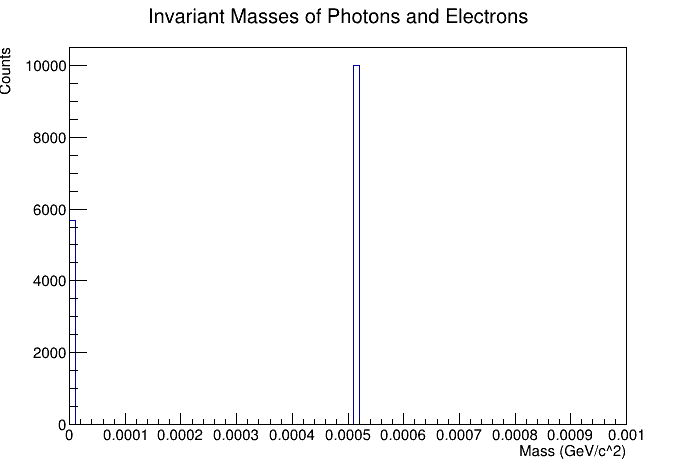

In [ ]:
#Step 1: Create a canvas
canvas = TCanvas('c1','Invariant Masses',700,500)
#Step 2: Creating a histogram
histogram = TH1D('h1','Invariant Masses of Photons and Electrons; Mass (GeV/c^2); Counts',100,0,0.001)

#Step 3: Filling the histogram
for row in pure_dataframe.iloc:
  histogram.Fill(row['m'])

#Drawing the histogram
histogram.SetStats(0)
histogram.Draw()
gROOT.GetListOfCanvases().Draw()

**Protons and Neutrons**

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).


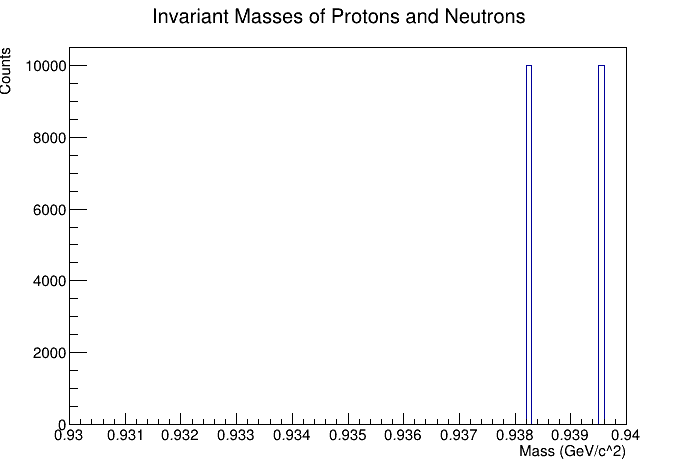

In [ ]:
#Step 1: Create a canvas
canvas = TCanvas('c1','Invariant Masses',700,500)
#Step 2: Creating a histogram
histogram = TH1D('h1','Invariant Masses of Protons and Neutrons; Mass (GeV/c^2); Counts',100,0.93,0.94)

#Step 3: Filling the histogram
for row in pure_dataframe.iloc:
  histogram.Fill(row['m'])

#Drawing the histogram
histogram.SetStats(0)
histogram.Draw()
gROOT.GetListOfCanvases().Draw()

---
## **Errors and Fluctuations**
---

Unfortunately, this data does not resemble real data. All detectors are prone to slight errors in it measurements. In our case, this can affect our measurements of the energy and momentum of these particles, which can affect our calculated invariant mass.

Run the code below to generate a more realistic ("smeared") dataset. Note that to simulate the error of our detector, we are simply adding a randomly generated error to the energies and momenta.

In [ ]:
error = 0.01
smeared_dataframe = pd.DataFrame()
smeared_dataframe['E'] = [E + np.random.normal(0,error*(E+0.3)) for E in pure_dataframe['E']]
smeared_dataframe['px'] = [px + np.random.normal(0,error*(px+0.3)) for px in pure_dataframe['px']]
smeared_dataframe['py'] = [py + np.random.normal(0,error*(py+0.3)) for py in pure_dataframe['py']]
smeared_dataframe['pz'] = [pz + np.random.normal(0,error*(pz+0.3)) for pz in pure_dataframe['pz']]
smeared_dataframe['m']=(smeared_dataframe['E']**2- smeared_dataframe['px']**2-smeared_dataframe['py']**2-smeared_dataframe['pz']**2)**0.5

####**Question #6:**
---
Write code in the cell below to create a histogram of the smeared invariant masses using ROOT.

#####**Solution:**

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).


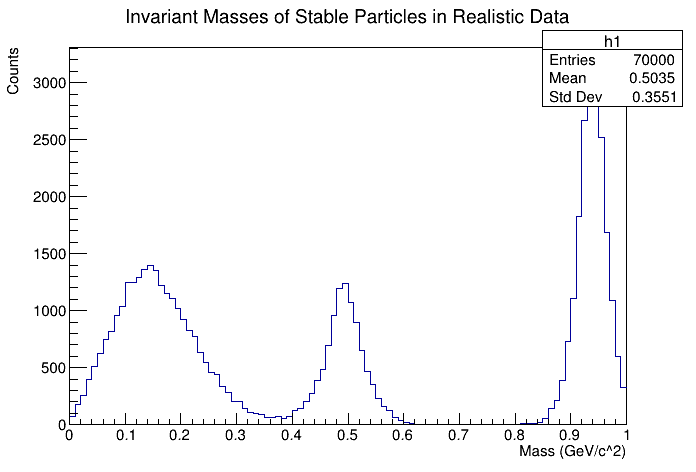

In [ ]:
#Step 1: Create a canvas
canvas = TCanvas('c1','Invariant Masses',700,500)
#Step 2: Creating a histogram
histogram = TH1D('h1','Invariant Masses of Stable Particles in Realistic Data; Mass (GeV/c^2); Counts',100,0,1)

#Step 3: Filling the histogram
for row in smeared_dataframe.iloc:
  histogram.Fill(row['m'])

#Drawing the histogram
histogram.Draw()
gROOT.GetListOfCanvases().Draw()

####**Question #7:**
---
Can the smeared data tell the difference between a proton and a neutron?

Double click to edit this cell and answer the following question: Can the smeared data tell the difference between a proton and a neutron?

#####**Solution:**

No. Even when you look at a very small range, the peaks are blurred so much that they completely overlap.

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).


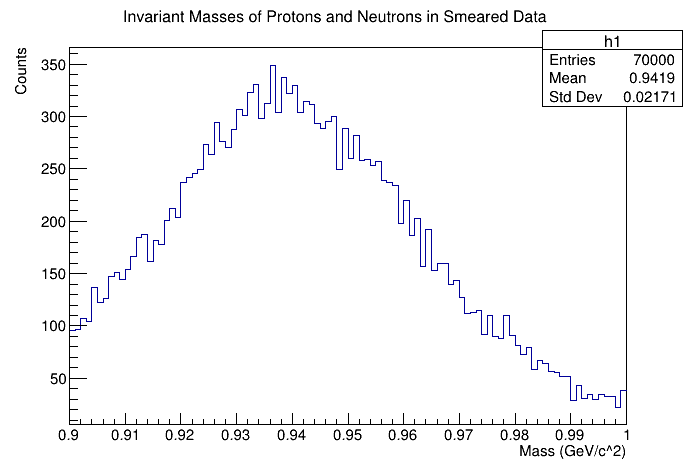

In [ ]:
#Step 1: Create a canvas
canvas = TCanvas('c1','Invariant Masses',700,500)
#Step 2: Creating a histogram
histogram = TH1D('h1','Invariant Masses of Protons and Neutrons in Smeared Data; Mass (GeV/c^2); Counts',100,0.9,1)

#Step 3: Filling the histogram
for row in smeared_dataframe.iloc:
  histogram.Fill(row['m'])

#Drawing the histogram
histogram.Draw()
gROOT.GetListOfCanvases().Draw()

####**Question #8:**
---
If a detector is less precise in its measurements of momentum and energy, how would the histogram of invariant masses change? Modify the code below to test your answer.

In [ ]:
error = 0.01
smeared_dataframe = pd.DataFrame()
smeared_dataframe['E'] = [E + np.random.normal(0,error*(E+0.3)) for E in pure_dataframe['E']]
smeared_dataframe['px'] = [px + np.random.normal(0,error*(px+0.3)) for px in pure_dataframe['px']]
smeared_dataframe['py'] = [py + np.random.normal(0,error*(py+0.3)) for py in pure_dataframe['py']]
smeared_dataframe['pz'] = [pz + np.random.normal(0,error*(pz+0.3)) for pz in pure_dataframe['pz']]
smeared_dataframe['m']=(smeared_dataframe['E']**2- smeared_dataframe['px']**2-smeared_dataframe['py']**2-smeared_dataframe['pz']**2)**0.5

#Step 1: Create a canvas
canvas = TCanvas('c1','Invariant Masses',700,500)
#Step 2: Creating a histogram
histogram = TH1D('h1','Invariant Masses of Stable Particles in Realistic Data; Mass (GeV/c^2); Counts',100,0,1)

#Step 3: Filling the histogram
for row in smeared_dataframe.iloc:
  histogram.Fill(row['m'])

#Drawing the histogram
histogram.Draw()
gROOT.GetListOfCanvases().Draw()

Double click to edit this cell and answer the following question: If a detector is less precise in its measurements of momentum and energy, how would the histogram of invariant masses change?

#####**Solution:**

As you increase the error (meaning the detector is less precise in its measurements), the peaks become wider:

**Low error:**

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).


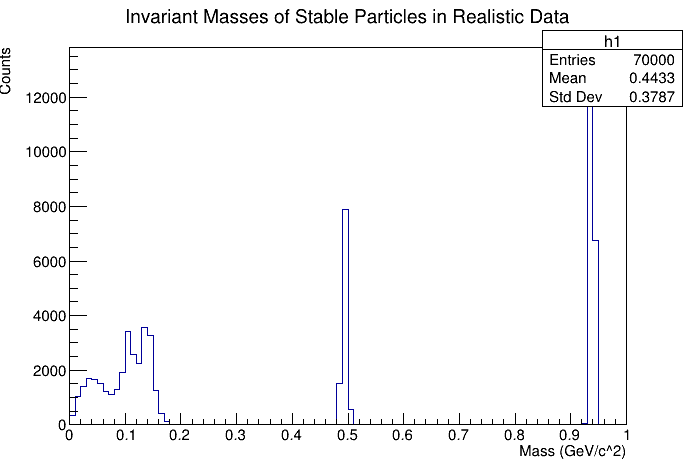

In [ ]:
resolution = 0.001
smeared_dataframe = pd.DataFrame()
smeared_dataframe['E'] = [E + np.random.normal(0,resolution*(E+0.3)) for E in pure_dataframe['E']]
smeared_dataframe['px'] = [px + np.random.normal(0,resolution*(px+0.3)) for px in pure_dataframe['px']]
smeared_dataframe['py'] = [py + np.random.normal(0,resolution*(py+0.3)) for py in pure_dataframe['py']]
smeared_dataframe['pz'] = [pz + np.random.normal(0,resolution*(pz+0.3)) for pz in pure_dataframe['pz']]
smeared_dataframe['m']=(smeared_dataframe['E']**2- smeared_dataframe['px']**2-smeared_dataframe['py']**2-smeared_dataframe['pz']**2)**0.5

#Step 1: Create a canvas
canvas = TCanvas('c1','Invariant Masses',700,500)
#Step 2: Creating a histogram
histogram = TH1D('h1','Invariant Masses of Stable Particles in Realistic Data; Mass (GeV/c^2); Counts',100,0,1)

#Step 3: Filling the histogram
for row in smeared_dataframe.iloc:
  histogram.Fill(row['m'])

#Drawing the histogram
histogram.Draw()
gROOT.GetListOfCanvases().Draw()

**High error:**

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).


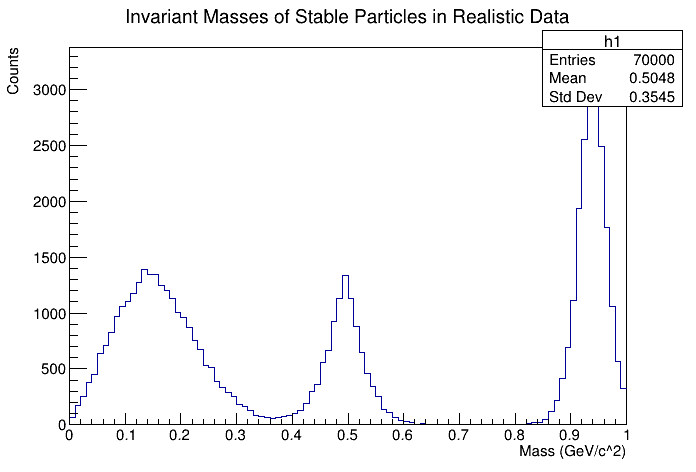

In [ ]:
error = 0.01
smeared_dataframe = pd.DataFrame()
smeared_dataframe['E'] = [E + np.random.normal(0,error*(E+0.3)) for E in pure_dataframe['E']]
smeared_dataframe['px'] = [px + np.random.normal(0,error*(px+0.3)) for px in pure_dataframe['px']]
smeared_dataframe['py'] = [py + np.random.normal(0,error*(py+0.3)) for py in pure_dataframe['py']]
smeared_dataframe['pz'] = [pz + np.random.normal(0,error*(pz+0.3)) for pz in pure_dataframe['pz']]
smeared_dataframe['m']=(smeared_dataframe['E']**2- smeared_dataframe['px']**2-smeared_dataframe['py']**2-smeared_dataframe['pz']**2)**0.5

#Step 1: Create a canvas
canvas = TCanvas('c1','Invariant Masses',700,500)
#Step 2: Creating a histogram
histogram = TH1D('h1','Invariant Masses of Stable Particles in Realistic Data; Mass (GeV/c^2); Counts',100,0,1)

#Step 3: Filling the histogram
for row in smeared_dataframe.iloc:
  histogram.Fill(row['m'])

#Drawing the histogram
histogram.Draw()
gROOT.GetListOfCanvases().Draw()

####**Question #9:**
---
Increasing the number of bins in the histogram typically makes the histogram looks smoother. What may be some disadvantages of increasing the number of bins? **Hint:** look at the values of counts as you increase the number of bins.

Double click to edit this cell and answer the following question: What may be some disadvantages of increasing the number of bins?

#####**Solution:**

As you increase the number of bins, the histogram will look smoother, but it will also decrease the counts. This can be an issue when you do not have enough data to fill in all of the bins, which can make it difficult to see a pattern. For example, the histogram below has too many bins, and thus the distribution is hard to see. **Note:** It may take a while to run.

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).


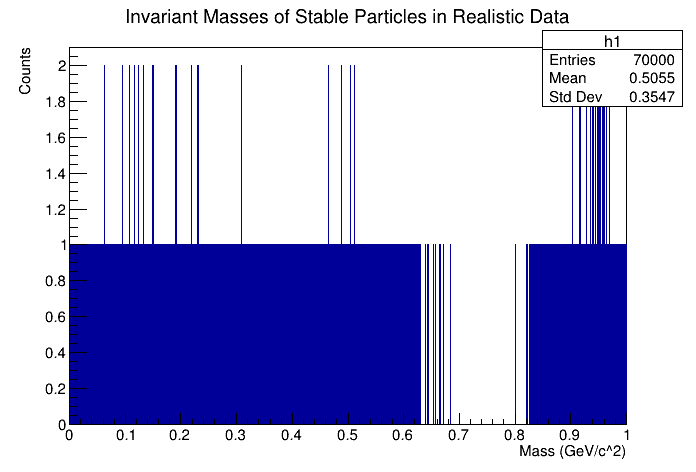

In [ ]:
error = 0.01
smeared_dataframe = pd.DataFrame()
smeared_dataframe['E'] = [E + np.random.normal(0,error*(E+0.3)) for E in pure_dataframe['E']]
smeared_dataframe['px'] = [px + np.random.normal(0,error*(px+0.3)) for px in pure_dataframe['px']]
smeared_dataframe['py'] = [py + np.random.normal(0,error*(py+0.3)) for py in pure_dataframe['py']]
smeared_dataframe['pz'] = [pz + np.random.normal(0,error*(pz+0.3)) for pz in pure_dataframe['pz']]
smeared_dataframe['m']=(smeared_dataframe['E']**2- smeared_dataframe['px']**2-smeared_dataframe['py']**2-smeared_dataframe['pz']**2)**0.5

#Step 1: Create a canvas
canvas = TCanvas('c1','Invariant Masses',700,500)
#Step 2: Creating a histogram
histogram = TH1D('h1','Invariant Masses of Stable Particles in Realistic Data; Mass (GeV/c^2); Counts',100000000,0,1)

#Step 3: Filling the histogram
for row in smeared_dataframe.iloc:
  histogram.Fill(row['m'])

#Drawing the histogram
histogram.Draw()
gROOT.GetListOfCanvases().Draw()